DenseNet - dane kliniczne


In [1]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf
import numpy as np

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
import random

TensorFlow Version: 2.1.0
Default GPU Device: /device:GPU:0


## wczytywanie danych

In [2]:
import pydot
import graphviz

In [3]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9141752756212045580
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3135687886
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4019800752637374392
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [4]:
#print(os.listdir(r'C:\Users\kaczm\Desktop\Data3\\Data'))
import numpy as np
import os
import random
raw = os.listdir(r'C:\Users\kaczm\Desktop\Data3\\Data')
random.Random(461123).shuffle(raw)
Train = raw[0:12]
Valid = raw[12:16]
Test = raw[16:20]

print(len(Train))
print(len(Valid))
print(len(Test))

#461123

12
4
4


## generator wczywujący dane

Generator zwraca 3 slajsy wycentrowane wokół woksela, którego rozpatrujemy

In [7]:

import numpy as np
import os
#dataset = pydicom.dcmread(r'C:\Users\kaczm\Desktop\Data3\3Dircadb1.1\PATIENT_DICOM' + '\\' + raw[1])

import nibabel as nib

import SimpleITK as sitk
#path = r"C:\Users\kaczm\Desktop\Data3\\"
def para():
    #aa = 0
    path = "C:\\Users\\kaczm\\Desktop\\Data3\\"
    raw = Train
    random.Random().shuffle(raw)
    #print(raw)
   # C:\Users\kaczm\Desktop\Data3\t1
    #suma = np.zeros(2)
    for patient in raw:
        #print(aa)
        sitk_t1 = sitk.ReadImage(path + 't1'+ '\\t1_'  + patient)
        sitk_t2 = sitk.ReadImage(path + 't2' + '\\t2_' + patient)

        # and access the numpy array:
        t1 = sitk.GetArrayFromImage(sitk_t1)
        t2 = sitk.GetArrayFromImage(sitk_t2)
        
        

        
        srednia = np.mean(t1)
        gdzie = np.where(((t1-srednia)>0))
        t1 = t1**2
        x = gdzie[0]
        y = gdzie[1]
        z = gdzie[2]
        
        # podczas testów był brany co któryś przypadek w celu przyspieszenia obliczeń
        x=x[::50]
        y=y[::50]
        z=z[::50]
        
        #print(len(x))
        t1 = t1.reshape(np.shape(t1)[0],512,512,1)
        t2 = t2.reshape(np.shape(t2)[0],512,512,1)
        temp11 = np.zeros((29,29,1))
        temp12 = np.zeros((29,29,1))
        temp13 = np.zeros((29,29,1))
        #aa+=1
        t2 = tf.keras.utils.to_categorical(t2,2)
        
        #rint(suma)
        #print(len(x))
        for i in range(len(x)):
            if np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[0] == 29 and np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[1] == 29 and np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[2] == 29:

                temp11[:,:,0:1] = t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i],0:1]

                temp12[:,:,0:1] = t1[x[i],y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1]

                temp13[:,:,0:1] = t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i],0:1]

                temp14 = t2[x[i],y[i],z[i]]
                
                

                #suma+=temp14
                
                yield((temp11,temp12,temp13),(temp14))
            else:
                None

In [5]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from skimage import measure

def plot_3d(image,): 
    p = image.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes(p, level=None, spacing=(1., 1., 1.),
                   gradient_direction='descent', step_size=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.80)
    face_color = [0.3, 0.3, 0.3]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [7]:
def valid_para():
    path = "C:\\Users\\kaczm\\Desktop\\Data3\\"
    licz0 = np.array([0,0],dtype='float64')
    raw = Valid#[slajs:slajs+1]
    #print(raw)
   # C:\Users\kaczm\Desktop\Data3\t1
    for patient in raw:
        #print(patient)
        sitk_t1 = sitk.ReadImage(path + 't1'+ '\\t1_'  + patient)
        sitk_t2 = sitk.ReadImage(path + 't2' + '\\t2_' + patient)
        
        # and access the numpy array:
        t1 = sitk.GetArrayFromImage(sitk_t1)
        t2 = sitk.GetArrayFromImage(sitk_t2)
        
        t1 = np.sqrt(t1)
        #print(np.max(t1))
        srednia = np.mean(t1)
        #print(srednia)
        gdzie = np.where(((t1-srednia)>0))
        x = gdzie[0]
        y = gdzie[1]
        z = gdzie[2]
        
        x=x[::10]
        y=y[::10]
        z=z[::10]
        
        
        
        #print(len(x))
        t1 = t1.reshape(np.shape(t1)[0],512,512,1)
        t2 = t2.reshape(np.shape(t2)[0],512,512,1)
        temp11 = np.zeros((29,29,1))
        temp12 = np.zeros((29,29,1))
        temp13 = np.zeros((29,29,1))
        #aa+=1
        t2 = tf.keras.utils.to_categorical(t2,2)
        
        
        #rint(suma)
        #print(len(x))
        for i in range(len(x)):
            if np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[0] == 29 and np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[1] == 29 and np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[2] == 29:

                temp11[:,:,0:1] = t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i],0:1]

                temp12[:,:,0:1] = t1[x[i],y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1]

                temp13[:,:,0:1] = t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i],0:1]

                temp14 = t2[x[i],y[i],z[i]]
                licz0 += temp14
                
                

                
                yield((temp11,temp12,temp13),(temp14))
            else:
                None
    print(licz0)
'''licznik2=0
for ddb in valid_para():
    licznik2+=1
    
print(licznik2)
valid_gen = tf.data.Dataset.from_generator(
     valid_para,
     output_types=types,output_shapes=shapes)
valid_gen = valid_gen.repeat(100).batch(batch_size)#.shuffle(1000,  reshuffle_each_iteration=True)



validations_steps = licznik2 / (batch_size) #ilość kawałków x plików /batch_size
validation = model.evaluate(
    x=valid_gen,  batch_size=None, verbose=1, sample_weight=None, steps=validations_steps,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=True
)
print(validation)

slajs+=1
print(slajs)'''              


'licznik2=0\nfor ddb in valid_para():\n    licznik2+=1\n    \nprint(licznik2)\nvalid_gen = tf.data.Dataset.from_generator(\n     valid_para,\n     output_types=types,output_shapes=shapes)\nvalid_gen = valid_gen.repeat(100).batch(batch_size)#.shuffle(1000,  reshuffle_each_iteration=True)\n\n\n\nvalidations_steps = licznik2 / (batch_size) #ilość kawałków x plików /batch_size\nvalidation = model.evaluate(\n    x=valid_gen,  batch_size=None, verbose=1, sample_weight=None, steps=validations_steps,\n    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=True\n)\nprint(validation)\n\nslajs+=1\nprint(slajs)'

In [ ]:
licznik1=0

#for ddb in para():
#    licznik1+=1
#print(licznik1)
licznik2=0
for ddb in valid_para():
    licznik2+=1

print(licznik2)


In [ ]:
validations_steps = licznik2 / (batch_size) #ilość kawałków x plików /batch_size
validation = model.evaluate(
    x=valid_gen,  batch_size=None, verbose=1, sample_weight=None, steps=validations_steps,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=True
)
print(validation)

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Metryki dla zbioru walidacyjnego danych klinicznych DenseNet 2.5D")
plt.plot(thresholds,validation[1],label='Precyzja')
plt.plot(thresholds,validation[2],label='Czułość')
plt.plot(thresholds,(((1/validation[1]) + (1/validation[2]))/2)**(-1),label='Dice')
plt.xlabel('Próg klasyfikacji')
plt.ylabel('Wartość  metryk')
plt.legend(framealpha=1, frameon=True)
plt.grid()
#plt.ylim(0.995,1)
plt.show()

In [8]:
licznik1 =205516
licznik2 = 86588
print(licznik1)
print(licznik2)

205516
86588


In [9]:
px=29
px2=29


types = ( (tf.float32,tf.float32,tf.float32),
          (tf.float32) )
shapes = (([px,px,1],[px,px,1],[px,px,1]),
          ([2]))
dataset = tf.data.Dataset.from_generator(para,
                                      output_types=types,
                                      output_shapes=shapes
                                     )
# Define a model


batch_size = 128
dataset = dataset.repeat(101).batch(batch_size)#.shuffle(1000,  reshuffle_each_iteration=True)

valid_gen = tf.data.Dataset.from_generator(
     valid_para,
     output_types=types,output_shapes=shapes)
valid_gen = valid_gen.repeat(100).batch(batch_size)#.shuffle(1000,  reshuffle_each_iteration=True)

print(dataset)
print(valid_gen)

<BatchDataset shapes: (((None, 29, 29, 1), (None, 29, 29, 1), (None, 29, 29, 1)), (None, 2)), types: ((tf.float32, tf.float32, tf.float32), tf.float32)>
<BatchDataset shapes: (((None, 29, 29, 1), (None, 29, 29, 1), (None, 29, 29, 1)), (None, 2)), types: ((tf.float32, tf.float32, tf.float32), tf.float32)>


In [10]:
#budowanie sieci

#U-net 3d z CH
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau,TerminateOnNaN
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
from tensorflow.keras.layers import BatchNormalization, Dense
#start_neurons = 16
def build_model(input_layer1,input_layer2,input_layer3, start_neurons):
    # 128 -> 64
    
    #block11
    conv11 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer1) 
    conv12 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv11)
    Cconv12 = concatenate([conv12,conv11])
    
    conv13 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv12)
    
    Cconv13 = concatenate([conv13,Cconv12])
    conv14 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv13)
    
    conv15 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv14)
    pool1 = MaxPooling2D((2,2))(conv15)
    
    #block12
    
    conv21 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(pool1) 
    conv22 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv21)
    Cconv22 = concatenate([conv22,conv21])
    
    conv23 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv22)
    
    Cconv23 = concatenate([conv23,Cconv22])
    conv24 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv23)
    
    conv25 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv24)
    pool12 = MaxPooling2D((2,2))(conv25)
    ##########################################################
    #block21
    conv11 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer2) 
    conv12 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv11)
    Cconv12 = concatenate([conv12,conv11])
    
    conv13 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv12)
    
    Cconv13 = concatenate([conv13,Cconv12])
    conv14 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv13)
    
    conv15 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv14)
    pool1 = MaxPooling2D((2,2))(conv15)
    
    #block22
    
    conv21 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(pool1) 
    conv22 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv21)
    Cconv22 = concatenate([conv22,conv21])
    
    conv23 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv22)
    
    Cconv23 = concatenate([conv23,Cconv22])
    conv24 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv23)
    
    conv25 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv24)
    pool22 = MaxPooling2D((2,2))(conv25)
    ################################################
    #block31
    conv11 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer3) 
    conv12 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv11)
    Cconv12 = concatenate([conv12,conv11])
    
    conv13 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv12)
    
    Cconv13 = concatenate([conv13,Cconv12])
    conv14 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv13)
    
    conv15 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv14)
    pool1 = MaxPooling2D((2,2))(conv15)
    
    #block32
    
    conv21 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(pool1) 
    conv22 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv21)
    Cconv22 = concatenate([conv22,conv21])
    
    conv23 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv22)
    
    Cconv23 = concatenate([conv23,Cconv22])
    conv24 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(Cconv23)
    
    conv25 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv24)
    pool32 = MaxPooling2D((2,2))(conv25)

    
    Cfinal = concatenate([pool12,pool22,pool32])
    Flat = Flatten()(Cfinal)
    output_layer = Dense(2, activation="softmax")(Flat)
    
    return output_layer
px = 29
px2 = 29
input_layer1 = Input((px, px, 1))
input_layer2 = Input((px, px, 1))
input_layer3 = Input((px, px, 1))

#input_layers = [input_layer1,input_layer2,input_layer3]
output_layer = build_model(input_layer1,input_layer2,input_layer3, 32)
inputs = (input_layer1,input_layer2,input_layer3)
model = Model(inputs = inputs, outputs= output_layer)

# source: https://github.com/keras-team/keras/issues/3611
import tensorflow.keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

def f1(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    return 2 * (K.sum(y_true * y_pred)+ K.epsilon()) / (K.sum(y_true) + K.sum(y_pred) + K.epsilon())


##############################################################


def dice(y_true, y_pred):
    smooth = 1
    intersection = K.sum(y_true * y_pred, axis=list(range(1, K.ndim(y_true))))
    union = K.sum(y_true, axis=list(range(1, K.ndim(y_true)))) + K.sum(y_pred, axis=list(range(1, K.ndim(y_true))))
    return K.mean((2. * intersection + smooth) / (union + smooth), axis=0)

thresholds = [ 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,  0.11, 0.12, 0.13,
 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,  0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27,
 0.28, 0.29, 0.3,  0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4,  0.41,
 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69,
 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83,
 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
 0.98, 0.99]




adam = tf.keras.optimizers.Adam(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')
precision = tf.keras.metrics.Precision(
    thresholds=thresholds, class_id=1)
recall = tf.keras.metrics.Recall(
    thresholds=thresholds, top_k=None, class_id=1)




model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=[precision,recall])
model.summary(positions=[.33, .66, .78, 1.])


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape                    Param #     Connected to          
input_1 (InputLayer)            [(None, 29, 29, 1)]             0                                 
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 29, 29, 1)]             0                                 
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 29, 29, 1)]             0                                 
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 29, 29, 32)              320         input_1[0][0]         
______________________________________________________________________________________________

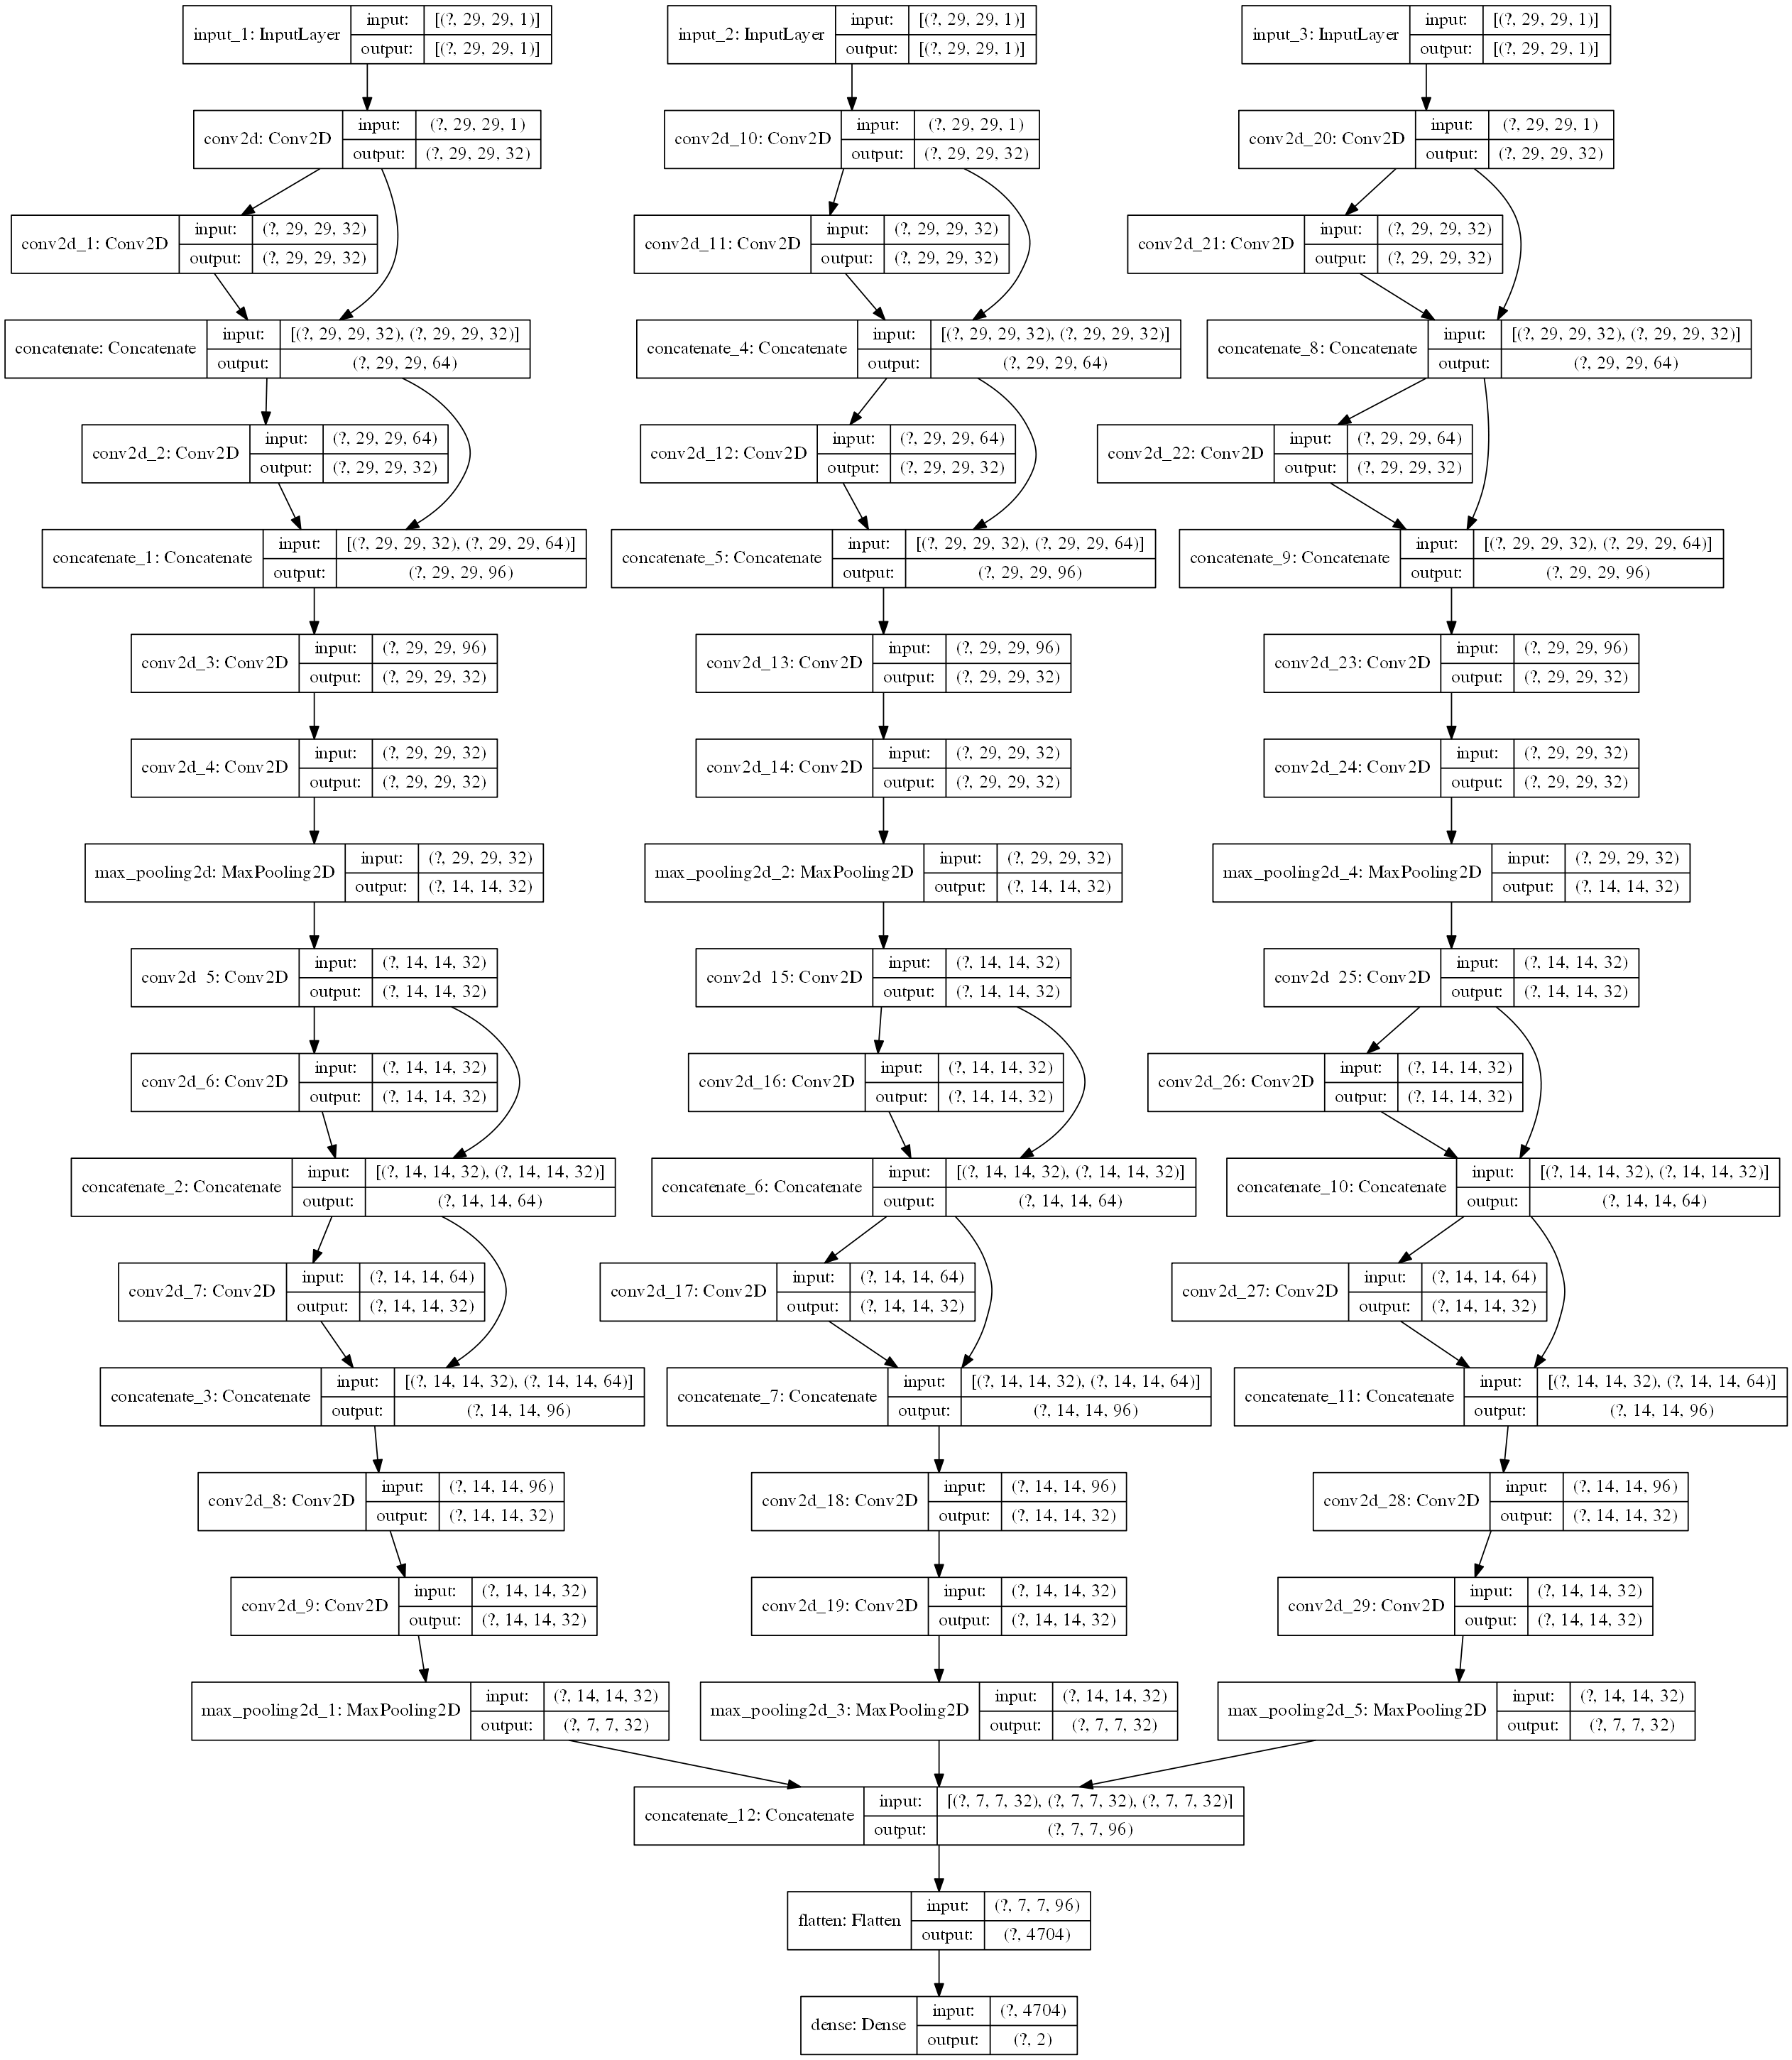

In [11]:

tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=128
)

In [12]:
checkpoint_path = "model-densenetv1-final-3.h5"#obecny trening
model.load_weights(checkpoint_path)
print('cheackpoint wczytany')

cheackpoint wczytany


In [ ]:


callbacks = [
    EarlyStopping(patience=55, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=35, min_lr=0.00001, verbose=1),
    ModelCheckpoint("model-densenetv1-ircad-norm.h5", verbose=1, save_best_only=True, save_weights_only=True),
    TerminateOnNaN(),
    tf.keras.callbacks.TensorBoard(log_dir=r'C:\Users\kaczm\Desktop\logs\ircad2-densenetvfinal', histogram_freq=1)    
]
epochs = 100
steps_per_epoch = licznik1 / batch_size #ilość kawałków x plików / batch_size* z dokładnościa do dziielnia przez 32

validations_steps = licznik2 / batch_size #ilość kawałków x plików /batch_size

history = model.fit( dataset, validation_data=valid_gen, callbacks=callbacks, initial_epoch=50,
                    epochs=epochs, validation_steps = validations_steps, steps_per_epoch=steps_per_epoch
                    )

#około 50 minut na epokę

In [13]:
'''Epoch 00024: val_loss did not improve from 0.62423
7518/7517 [==============================] - 1333s 177ms/step - 
loss: 0.1707 - precision: 0.9259 - recall: 0.9259 - get_f1: 0.9259 - dice: 0.9296 - 
val_loss: 0.7697 - val_precision: 0.7636 - val_recall: 0.7636 - val_get_f1: 0.7636 - val_dice: 0.8329'''


validations_steps = licznik2 / (batch_size) #ilość kawałków x plików /batch_size
validation = model.evaluate(
    x=valid_gen,  batch_size=None, verbose=1, sample_weight=None, steps=validations_steps,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=True
)

2203/2202 [==============================] - 142s 64ms/step - loss: 0.3422 - precision: 0.4291 - recall: 0.6105


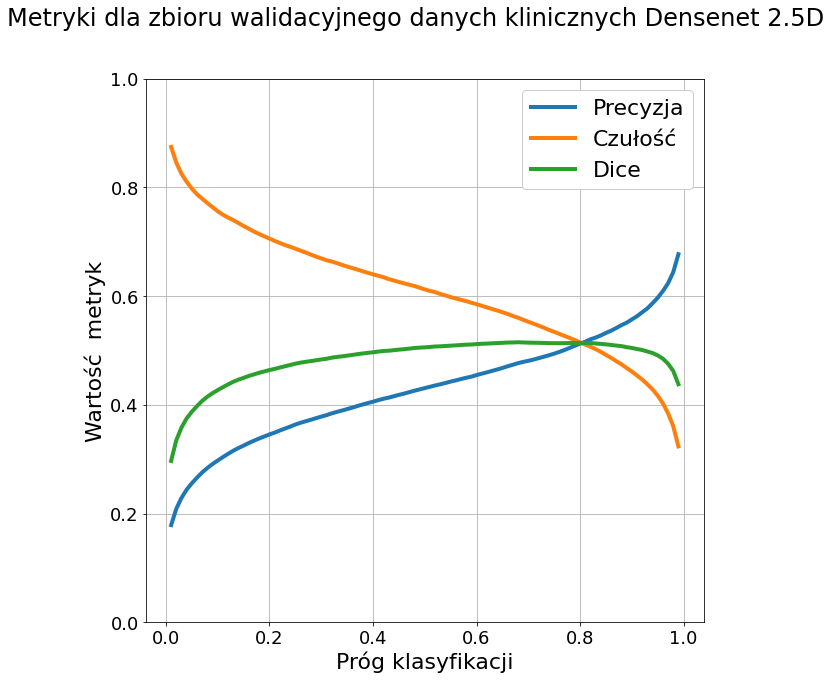

In [15]:
plt.figure(figsize=(10,10))
plt.suptitle("Metryki dla zbioru walidacyjnego danych klinicznych Densenet 2.5D",fontsize=24)
plt.plot(thresholds,validation[1],label='Precyzja',linewidth=4)
plt.plot(thresholds,validation[2],label='Czułość',linewidth=4)
plt.plot(thresholds,(((1/validation[1]) + (1/validation[2]))/2)**(-1),label='Dice',linewidth=4)
plt.xlabel('Próg klasyfikacji', fontsize=22)
plt.ylabel('Wartość  metryk', fontsize=22)
plt.legend(framealpha=1, frameon=True,fontsize = 22)
plt.grid()
plt.ylim(0,1)
plt.tick_params(labelsize=18)
plt.show()


In [133]:
valid_para
path = "C:\\Users\\kaczm\\Desktop\\Data3\\"
licz0 = np.array([0,0],dtype='float64')
raw = Test[3:4]
#print(raw)
# C:\Users\kaczm\Desktop\Data3\t1
for patient in raw:
    #print(patient)
    sitk_t1 = sitk.ReadImage(path + 't1'+ '\\t1_'  + patient)
    sitk_t2 = sitk.ReadImage(path + 't2' + '\\t2_' + patient)

    # and access the numpy array:
    t1 = sitk.GetArrayFromImage(sitk_t1)
    t2 = sitk.GetArrayFromImage(sitk_t2)

    #t1 = np.sqrt(t1)
    #print(np.max(t1))
    srednia = np.mean(t1)
    #print(srednia)
    gdzie = np.where(((t1-srednia)>0))
    x = gdzie[0]
    y = gdzie[1]
    z = gdzie[2]
    t1 = t1**2

    #x=x[::50]
    #y=y[::50]
    #z=z[::50]


    #print(len(x))
    t1 = t1.reshape(np.shape(t1)[0],512,512,1)
    t2 = t2.reshape(np.shape(t2)[0],512,512,1)
    temp11 = np.zeros((len(x),29,29,1))
    temp12 = np.zeros((len(x),29,29,1))
    temp13 = np.zeros((len(x),29,29,1))
    temp14 = np.zeros((len(x),2))
    #aa+=1
    t2 = tf.keras.utils.to_categorical(t2,2)

    Preds = np.zeros((len(x),2))
    #rint(suma)
    print(len(x))
    ilosc = len(x)
    for i in range(len(x)):
        if np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[0] == 29 and np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[1] == 29 and np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[2] == 29:
            
            temp11[i,:,:,0:1] = t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i],0:1]

            temp12[i,:,:,0:1] = t1[x[i],y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1]

            temp13[i,:,:,0:1] = t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i],0:1]

            temp14[i,0:2] = t2[x[i],y[i],z[i]]
            licz0 += temp14[i,:]
            #temp14 = temp14.T



            

        else:
            None
    
    Preds[:,0:2] = model.predict((temp11,temp12,temp13), batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=None)
print(licz0)
print(np.shape(Preds))

809141
[666551.  63845.]
(809141, 2)


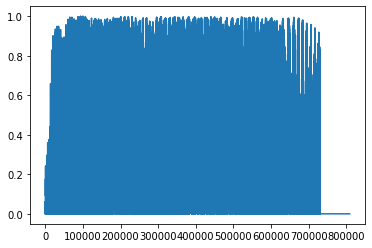

In [134]:
plt.plot(np.arange(ilosc),Preds[:,1])
plt.show()


In [141]:
thresholds = [0.4]
#thresholds = [ 0.05, 0.1,  0.15, 0.2,  0.25, 0.3,  0.35, 0.4,  0.45, 0.5,  0.55, 0.6,  0.65,
# 0.7 , 0.75, 0.8,  0.85, 0.9,  0.95,  ]
print(np.shape(thresholds))
print(thresholds)

PrecisionValid = tf.keras.metrics.Precision(
    thresholds=thresholds, top_k=None, class_id=None, name=None, dtype=None
)

RecallValid = tf.keras.metrics.Recall(
    thresholds=thresholds, top_k=None, class_id=None, name=None, dtype=None
)

FP = tf.keras.metrics.FalsePositives(
    thresholds=thresholds, name=None, dtype=None
)

TP = tf.keras.metrics.TruePositives(
    thresholds=thresholds, name=None, dtype=None
)

FN = tf.keras.metrics.FalseNegatives(
    thresholds=thresholds, name=None, dtype=None
)

TN = tf.keras.metrics.TrueNegatives(
    thresholds=thresholds, name=None, dtype=None
)

PrecisionValid.reset_states()
RecallValid.reset_states()

FP.reset_states()
TP.reset_states()
FN.reset_states()
TN.reset_states()



(1,)
[0.4]


In [142]:
PrecisionValid.update_state(
temp14[:,1], Preds[:,1])

RecallValid.update_state(
temp14[:,1], Preds[:,1])

TP.update_state(
temp14[:,1], Preds[:,1])

FP.update_state(
temp14[:,1], Preds[:,1])

TN.update_state(
temp14[:,1], Preds[:,1])

FN.update_state(
temp14[:,1], Preds[:,1])


In [143]:

print('Precision',PrecisionValid.result())
print("Recall",RecallValid.result())

print('FP',FP.result())
print('TP',TP.result())
print('FN',FN.result())
print('TN',TN.result())


print(np.max(TP.result()))
print('TP', np.sum(temp14[:,1]))
print(np.max(TN.result()))
print('TN', np.sum(temp14[:,0]))

#print(TP.result()+FN.result())
#print((TP.result()+FN.result())/np.sum(temp14[:,1]))

Precision tf.Tensor(0.33604738, shape=(), dtype=float32)
Recall tf.Tensor(0.53396505, shape=(), dtype=float32)
FP tf.Tensor(67356.0, shape=(), dtype=float32)
TP tf.Tensor(34091.0, shape=(), dtype=float32)
FN tf.Tensor(29754.0, shape=(), dtype=float32)
TN tf.Tensor(677940.0, shape=(), dtype=float32)
34091.0
TP 63845.0
677940.0
TN 666551.0


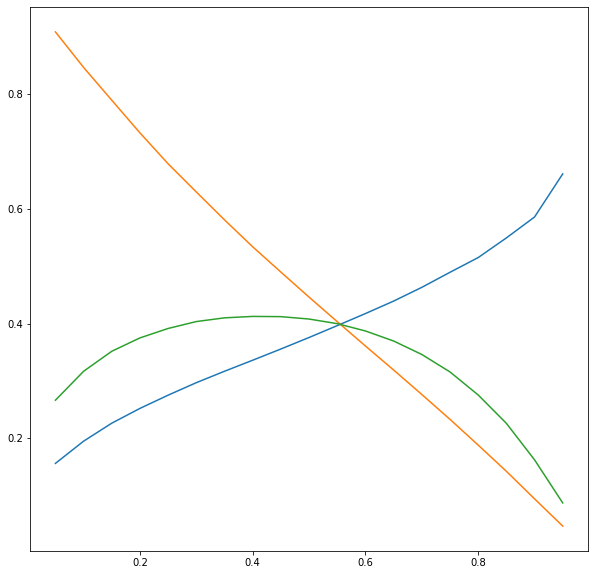

0.4124942


In [138]:
plt.figure(figsize=(10,10))
plt.plot(thresholds,PrecisionValid.result())
plt.plot(thresholds,RecallValid.result())
plt.plot(thresholds,(((1/PrecisionValid.result()) + (1/RecallValid.result()))/2)**(-1))
plt.show()


plt.show()

print(np.max((((1/PrecisionValid.result()) + (1/RecallValid.result()))/2)**(-1)))


## test predykcji

In [13]:
path = "C:\\Users\\kaczm\\Desktop\\Data3\\"
raw = Test[2:3]
#print(raw)
# C:\Users\kaczm\Desktop\Data3\t1
for patient in raw:
    #print(patient)
    sitk_t1 = sitk.ReadImage(path + 't1'+ '\\t1_'  + patient)
    sitk_t2 = sitk.ReadImage(path + 't2' + '\\t2_' + patient)

    # and access the numpy array:
    t1 = sitk.GetArrayFromImage(sitk_t1)
    t2 = sitk.GetArrayFromImage(sitk_t2)

    t1 = np.sqrt(t1)
    #print(np.max(t1))
    srednia = np.mean(t1)
    #print(srednia)
    gdzie = np.where(((t1)>0.2))
    x = gdzie[0]
    y = gdzie[1]
    z = gdzie[2]
    
    
    preds = np.zeros((len(x),2))
    t1 = t1.reshape(np.shape(t1)[0],512,512,1)
    t2 = t2.reshape(np.shape(t2)[0],512,512,1)
    temp11 = np.zeros((1,29,29,1))
    temp12 = np.zeros((1,29,29,1))
    temp13 = np.zeros((1,29,29,1))
    #aa+=1
    print('liczba wokseli:', len(x))
    t2 = tf.keras.utils.to_categorical(t2,2)
    from tqdm import tnrange, tqdm


    for i in tnrange(len(x),desc='Predykcje'):

        if np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[0] == 29 and np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[1] == 29 and np.shape(t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1])[2] == 29:
            #print(i)
            temp11[:,:,:,0:1] = t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i],0:1]

            temp12[:,:,:,0:1] = t1[x[i],y[i]-15:y[i]+14,z[i]-15:z[i]+14,0:1]

            temp13[:,:,:,0:1] = t1[x[i]-15:x[i]+14,y[i]-15:y[i]+14,z[i],0:1]

            temp14 = t2[x[i],y[i],z[i]]
            


            preds[i,:] = model.predict((temp11,temp12,temp13))



            #yield(,(temp14))
        #else:
            #None


liczba wokseli: 218070


In [14]:
np.savez_compressed('preds(34).npz', preds)

In [15]:
Obraz = np.zeros((t1.shape))
for i in tnrange(len(x),desc='Rekonstrukcja'):
    Obraz[x[i],y[i],z[i]] = preds[i,1]

(125, 512, 512, 1)


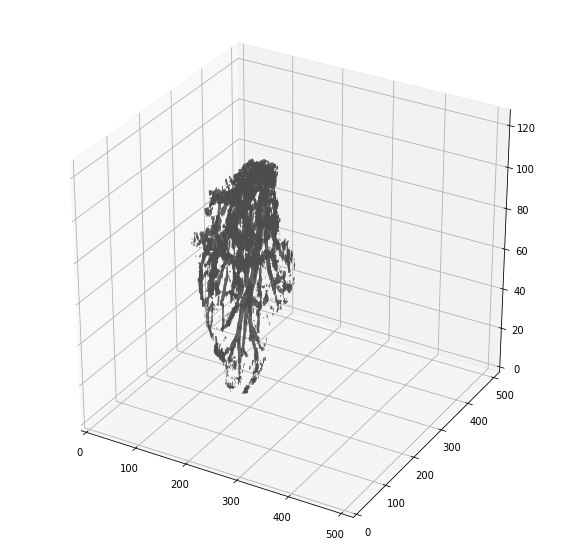

In [19]:
print(np.shape(Obraz))
plot_3d(Obraz[:,:,:,0])



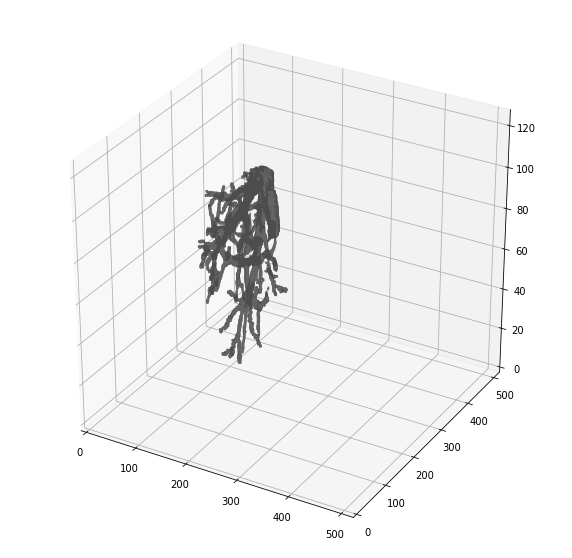

In [17]:
plot_3d(t2[:,:,:,1])

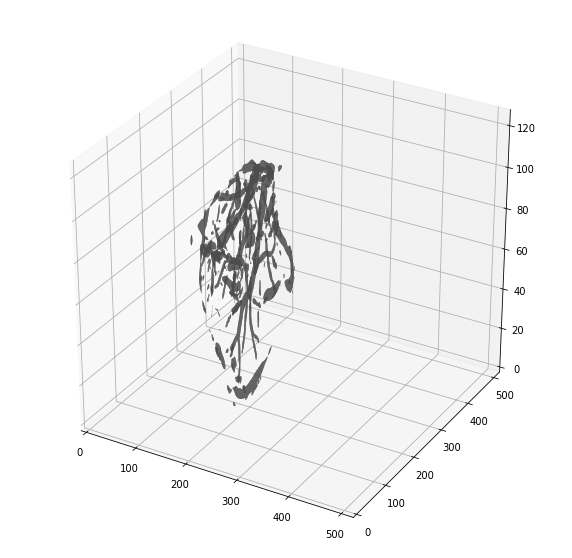

In [18]:
plot_3d(t1[:,:,:,0])

(125, 512, 512, 1)
1.0


(array([ 8.56683302,  4.97484543,  3.67969701,  2.79112682,  2.32470945,
         1.9582972 ,  1.70500552,  1.47384612,  1.37957898,  1.22219386,
         1.11071273,  1.02710188,  0.9762796 ,  0.88119276,  0.84758447,
         0.82299305,  0.71724992,  0.72544706,  0.62790107,  0.63609821,
         0.5836365 ,  0.6123265 ,  0.55002822,  0.53199451,  0.56232394,
         0.51887908,  0.51641994,  0.4910088 ,  0.5139608 ,  0.43772738,
         0.4680568 ,  0.42543167,  0.43526824,  0.42051338,  0.44018652,
         0.38608538,  0.41969367,  0.40247967,  0.41149652,  0.37870796,
         0.3811671 ,  0.37624881,  0.36149396,  0.3639531 ,  0.36723196,
         0.33608282,  0.34264053,  0.34346025,  0.33116453,  0.3582151 ,
         0.33854196,  0.34755882,  0.3582151 ,  0.33854196,  0.34346025,
         0.34837853,  0.31804911,  0.35329682,  0.33198425,  0.34182082,
         0.30739282,  0.33854196,  0.33280396,  0.3639531 ,  0.35411653,
         0.37215024,  0.3467391 ,  0.33854196,  0.3

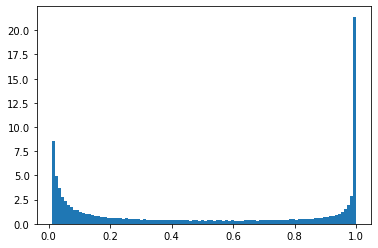

In [26]:
print(np.shape(Obraz))
print(np.max(Obraz))
plt.hist(Obraz.flat, bins=100, range=(0.01,1), density=True)

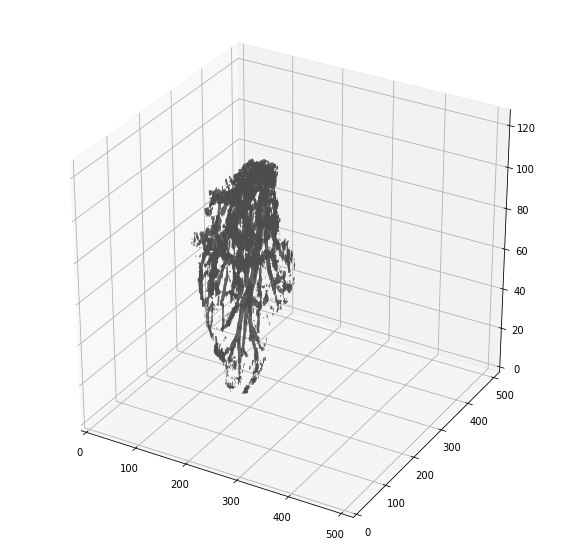

In [42]:
a = Obraz.copy()
np.where(a > 0.3, 1, 0)

plot_3d(a[:,:,:,0])

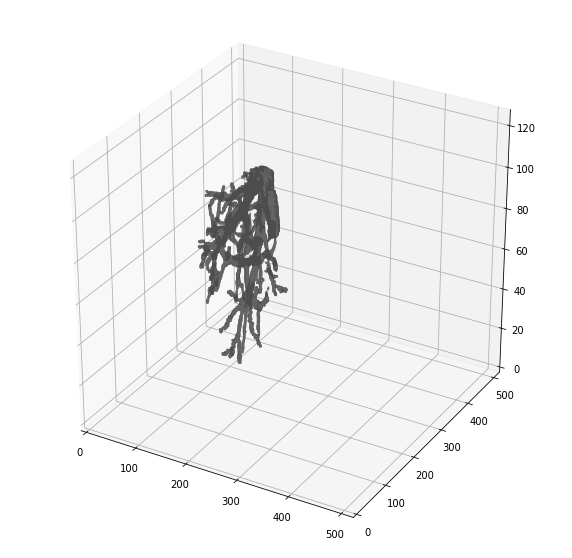

In [30]:
plot_3d(t2[:,:,:,1])

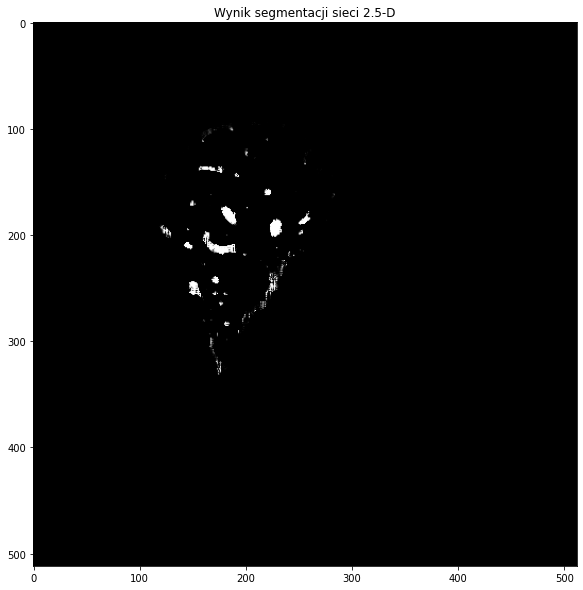

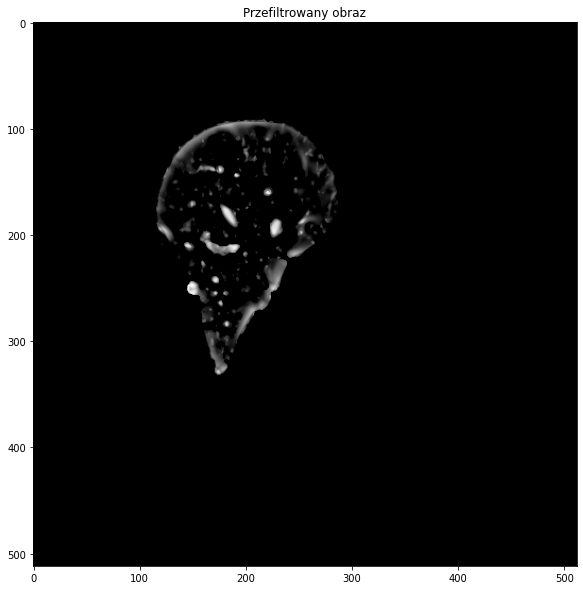

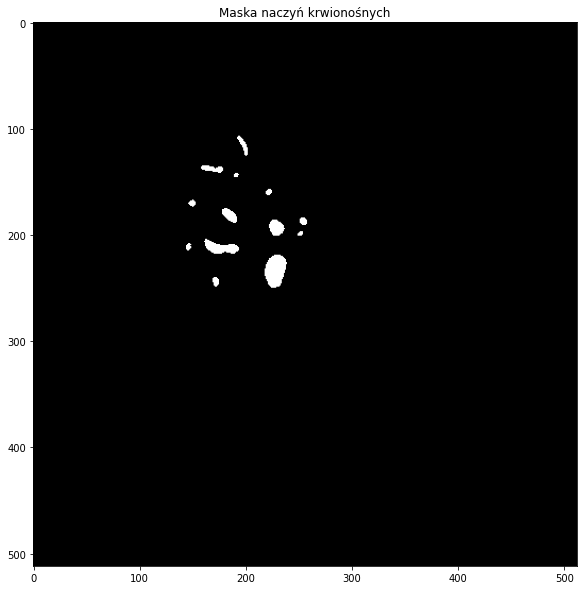

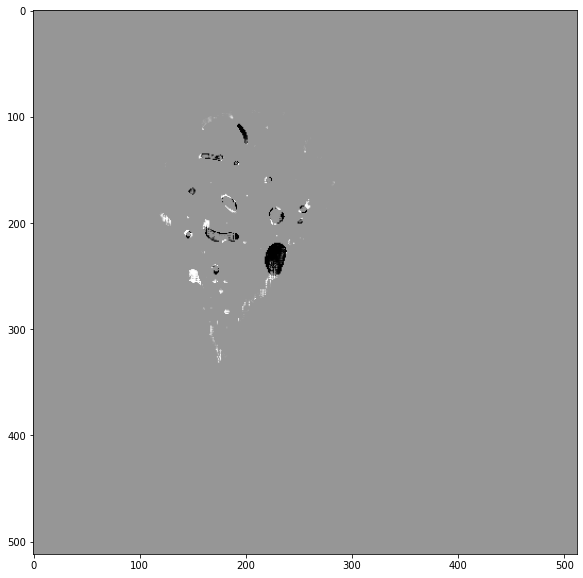

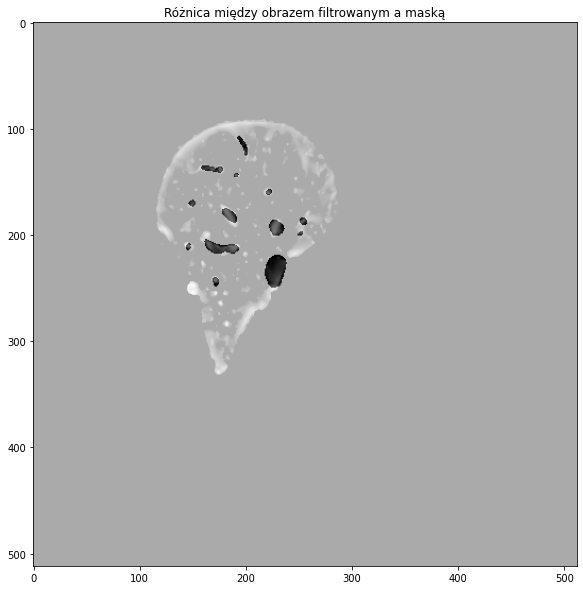

In [56]:
slajs=90

plt.figure(figsize=(10, 10))
plt.title("Wynik segmentacji sieci 2.5-D")
plt.imshow(a[slajs,:,:,0],cmap='Greys_r')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("Przefiltrowany obraz")
plt.imshow(t1[slajs,:,:,0],cmap='Greys_r')
plt.show()


plt.figure(figsize=(10, 10))
plt.title("Maska naczyń krwionośnych")
plt.imshow(t2[slajs,:,:,1],cmap='Greys_r')
plt.show()


plt.figure(figsize=(10, 10))
plt.imshow(a[slajs,:,:,0]-t2[slajs,:,:,1],cmap='Greys_r')
plt.show()

plt.figure(figsize=(10, 10))
plt.title("Różnica między obrazem filtrowanym a maską")
plt.imshow(t1[slajs,:,:,0]-t2[slajs,:,:,1],cmap='Greys_r')
plt.show()